In [170]:
import numpy as np
from nbparameterise import extract_parameters, parameter_values, replace_definitions
import nbformat
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, clear_output
import pickle

In [171]:
def update_input(a, b, c, d):
    
    # Open notebook
    with open("Network Utility Maximization.ipynb") as f:
        nb = nbformat.read(f, as_version=4)
        
    # Update the parameters
    orig_parameters = extract_parameters(nb)
    params = parameter_values(orig_parameters, max_iter=a, source=b, max_path=c, link=d)
    new_nb = replace_definitions(nb, params, False)
    
    # Save changes
    with open("Network Utility Maximization.ipynb", 'w') as f:
        nbformat.write(new_nb, f)
        
    data = {"max_iter": a, "source": b, "max_path": c, "link": d}
    pickle.dump(data, open("params.p", "wb"))

In [172]:
def run_simulator():

    # Run notebook
    %run "Network Utility Maximization.ipynb"

In [173]:
def generate_coeff(source):
    """ Generate random coefficients for the utility function """    
    
    return np.random.rand(source)

In [174]:
def random_graph(source, path, link):
    """ Generate a random graph (might be not practically feasible) """

    # Generate paths
    x = np.zeros((source, np.max(path), link))
    for i in range(source):
        x[i,:,:] = np.round(np.random.rand(path[i], link))
        
    # Check if some paths have zero links
    aux = np.where(np.sum(x, axis=2) == 0)[1]
    for idx, i in enumerate(np.where(np.sum(x, axis=2) == 0)[0]):
        z = int(np.floor(link * np.random.rand()))
        x[i,aux[idx], z] = 1
        
    # Scale factor for link capacity
    scale = 100
    
    return scale * np.random.rand(link), x

In [175]:
def erdos():
    print("Erdõs-Renyi model is not currently available. A random graph will be generated.")

In [176]:
def barabasi():
    print("Barabási-Albert model is not currently available. A random graph will be generated.")

In [177]:
def watts():
    print("Watts-Strogatz model is not currently available. A random graph will be generated.")

In [178]:
def generate_graph(source, max_path, link, graph_option):
    
    # Number of paths per OD pair
    path = max_path * np.ones(source, dtype='int32')
    
    # Define utility
    coeff = generate_coeff(source)

    graph = {0 : random_graph, 1 : erdos, 2 : barabasi, 3 : watts}
    if graph_option > 0:
        graph[graph_option]()
        graph_option = 0
    cl, x0 = graph[graph_option](source, path, link)
    
    data = {"coeff": coeff, "link_capacity": cl, "path": x0}
    
    # Store graph information in an external file 'graph.p'
    pickle.dump(data, open("graph.p", "wb"))

In [179]:
def f1(a1):
    global max_iter
    max_iter = a1

def f2(a2):
    global source
    source = a2

def f3(a3):
    global max_path
    max_path = a3

def f4(a4):
    global link
    link = a4
    
def f5(a5):
    global new_graph
    new_graph = a5
    
    if a5:
        w2.disabled = False
        w3.disabled = False
        w4.disabled = False
        w6.disabled = False
    else:
        w2.disabled = True
        w3.disabled = True
        w4.disabled = True
        w6.disabled = True
        
def f6(a6):
    global graph_option
    if a6 == 'Random graph':
        graph_option = 0
    elif a6 == 'Erdõs-Rényi model':
        graph_option = 1
    elif a6 == 'Barabási-Albert model':
        graph_option = 2
    else:
        graph_option = 3

In [180]:
# Macros
MAX_ITER_DEFAULT = 100
SOURCE_DEFAULT = 10
MAX_PATH_DEFAULT = 10
LINK_DEFAULT = 10

×-----------------------------×
INPUT PARAMETERS:
Iterations: 10000
Sources: 10
Paths: 5
Links: 50
×-----------------------------×
Simulator starts
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
CPU times: user 6.01 s, sys: 8 ms, total: 6.02 s
Wall time: 6.02 s
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
CPU times: user 5.8 s, sys: 8 ms, total: 5.81 s
Wall time: 5.81 s


<IPython.core.display.Javascript object>


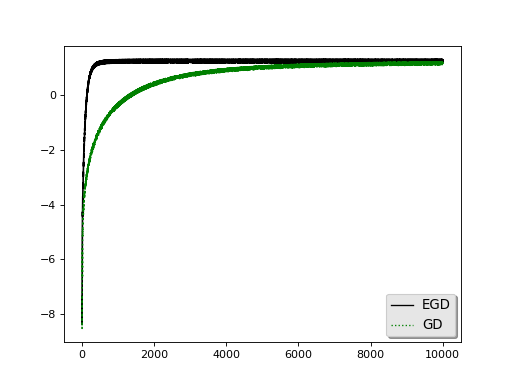

<IPython.core.display.Javascript object>


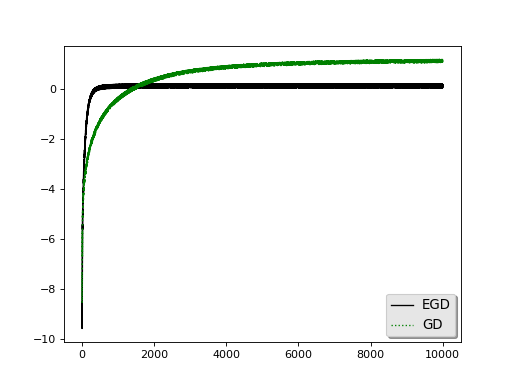

<IPython.core.display.Javascript object>


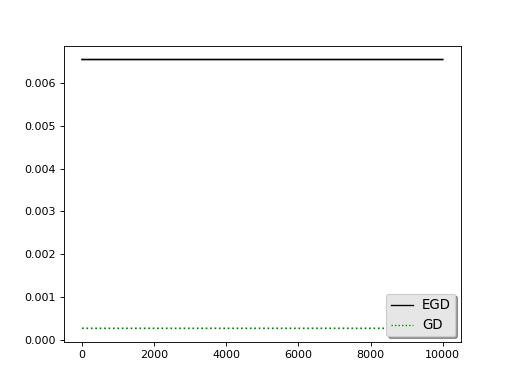

In [181]:
# Create sliders
w1 = widgets.IntSlider(description="Iterations", min=100, max=10000, step=100, value=MAX_ITER_DEFAULT)
interact(f1, a1=w1)
w2 = widgets.IntSlider(description="Sources", min=1, max=100, step=1, value=SOURCE_DEFAULT)
interact(f2, a2=w2)
w3 = widgets.IntSlider(description="Paths", min=1, max=100, step=1, value=MAX_PATH_DEFAULT)
interact(f3, a3=w3)
w4 = widgets.IntSlider(description="Links", min=1, max=100, step=1, value=LINK_DEFAULT)
interact(f4, a4=w4)
w5 = widgets.Checkbox(description="New network graph", value=True)
interact(f5, a5=w5)
w6 = widgets.Dropdown(description="Graph type",
                      options=['Random graph', 'Erdõs-Rényi model', 'Barabási-Albert model', 'Watts-Strogatz model'],
                      value='Random graph')
interact(f6, a6=w6)

# Create command button
button = widgets.Button(description="Run simulator")
display(button)

def on_button_clicked(b):
    clear_output()

    if new_graph:
        print("Generating a new network graph...")
        generate_graph(source, max_path, link, graph_option)
        print("Network graph generated!")
        
        # Update input variables
        print("Updating input variables...")
        update_input(max_iter, source, max_path, link)
        print("Variables updated successfully!")
    else:
        try:
            my_file1 = pickle.load(open("params.p", "rb"))
            update_input(max_iter, my_file1["source"], my_file1["max_path"], my_file1["link"])
        except:
            print("Input parameter file not found. Default values chosen.")
            update_input(MAX_ITER_DEFAULT, SOURCE_DEFAULT, MAX_PATH_DEFAULT, LINK_DEFAULT)
    
    my_file = pickle.load(open("params.p", "rb"))
    print("×-----------------------------×")
    print("INPUT PARAMETERS:")
    print("Iterations:", my_file["max_iter"])
    print("Sources:", my_file["source"])
    print("Paths:", my_file["max_path"])
    print("Links:", my_file["link"])
    print("×-----------------------------×")
    
    print("Simulator starts")
    run_simulator()
    
button.on_click(on_button_clicked)